In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)


In [ ]:
print(df.head())
print(df.info())


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


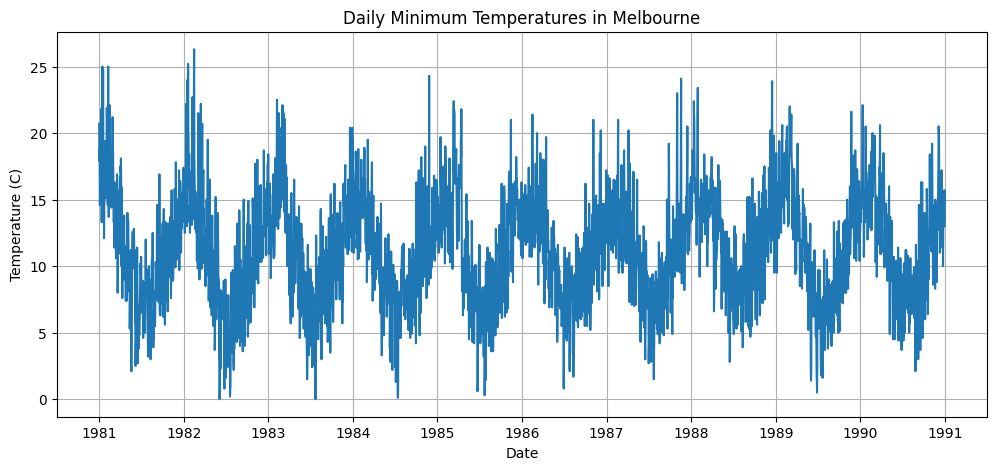

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
temps = df['Temp'].values.reshape(-1,1)
temps_scaled = scaler.fit_transform(temps)

In [ ]:
#creating sliding windows
import numpy as np

def create_sliding_windows(data,window_size=5):
  X=[]
  y=[]

  for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  return np.array(X),np.array(y)


In [ ]:
window_size = 5
X, y = create_sliding_windows(temps_scaled, window_size)

print(X,y)
print("X shape:", X.shape)
print("y shape:", y.shape)

[[[0.78707224]
  [0.68060837]
  [0.7148289 ]
  [0.55513308]
  [0.60076046]]

 [[0.68060837]
  [0.7148289 ]
  [0.55513308]
  [0.60076046]
  [0.60076046]]

 [[0.7148289 ]
  [0.55513308]
  [0.60076046]
  [0.60076046]
  [0.60076046]]

 ...

 [[0.38022814]
  [0.4904943 ]
  [0.55513308]
  [0.53231939]
  [0.51711027]]

 [[0.4904943 ]
  [0.55513308]
  [0.53231939]
  [0.51711027]
  [0.51330798]]

 [[0.55513308]
  [0.53231939]
  [0.51711027]
  [0.51330798]
  [0.59695817]]] [[0.60076046]
 [0.60076046]
 [0.66159696]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]
X shape: (3645, 5, 1)
y shape: (3645, 1)


In [ ]:
#train test split

split = int(len(X)*0.8)
X_train = X[:split]
y_train = y[:split]
X_test=X[split:]
y_test = y[split:]

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (2916, 5, 1)
X_test shape: (729, 5, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

In [ ]:
model = Sequential([
    SimpleRNN(units=32, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0263 - mae: 0.1242 - val_loss: 0.0088 - val_mae: 0.0738
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mae: 0.0793 - val_loss: 0.0085 - val_mae: 0.0726
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mae: 0.0767 - val_loss: 0.0078 - val_mae: 0.0697
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mae: 0.0756 - val_loss: 0.0076 - val_mae: 0.0686
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mae: 0.0759 - val_loss: 0.0075 - val_mae: 0.0683
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0096 - mae: 0.0765 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - mae: 0.0753 - val_loss: 0.0078 - val_mae: 0.0704
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0097 - mae: 0.0775 - val_loss: 0.0088 - val_mae: 0.0756
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - mae:

| Term                | Explanation                                       |
| ------------------- | ------------------------------------------------- |
| **Training Loss**   | Error on the data used to update weights          |
| **Validation Loss** | Error on unseen data to evaluate generalization   |
| **Purpose**         | Track model's true learning and avoid overfitting |


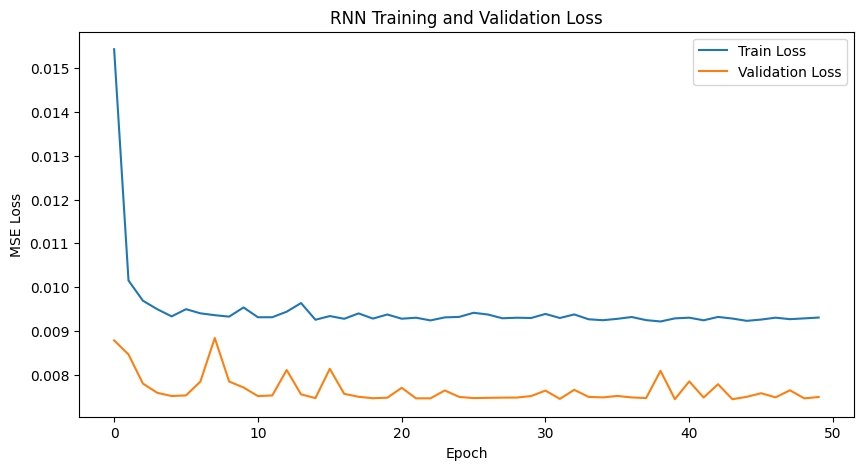

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('RNN Training and Validation Loss')
plt.show()


# Interpreting RNN Loss Curves in Time Series Forecasting

## 1 Understanding the Plot



- **X-axis**: Epochs (0-50)
- **Y-axis**: Mean Squared Error (MSE) Loss
- **Blue Line**: Training Loss
- **Orange Line**: Validation Loss

---

##  Key Observations

###  Steep Initial Drop
- The **sharp decline in the first 2 epochs** shows the model **rapidly learning the underlying structure** of the dataset.
- Common in well-conditioned datasets and appropriate learning rates.

###  Smooth Plateau
- After ~5 epochs, both training and validation losses **stabilize** around `~0.009–0.01`.
- Indicates the model **has learned most of the patterns** in the data and is converging.

###  Validation Loss < Training Loss
- Normally, training loss < validation loss due to overfitting.
- Here, **validation loss is slightly lower**:
    - This is **acceptable** in small, structured datasets.
    - Validation data might have **slightly less noise** than training data.
    - Indicates **good generalization** with **no overfitting**.

---

##  What does this Loss Mean?

Since we used **MinMaxScaler (0,1)**:
- **MSE ≈ 0.009** implies:
    
  $$\text{RMSE} = \sqrt{0.009} ≈ 0.094$$
    
- This means, on average, **the predicted normalized temperature deviates by ~0.09 units** from the true value in scaled units.

To understand the **real-world error**, we can multiply by the original standard deviation of the dataset.

---

##  Theoretical Alignment

### Why did RNN work well here?

 The task is **predicting the next day's temperature using the past 5 days**:
- This is **short-term dependency**, which vanilla RNNs can handle **effectively**.

 Data has **clear seasonality and trends**, which RNN can capture within the short window.

---

### Limitations:

 **If the window size is increased significantly** (e.g., 30+ days), **RNN may struggle**:
- **Vanishing gradients** will prevent learning long-term dependencies.
- Loss may plateau at higher values or decrease very slowly.

This limitation is precisely why **LSTMs and GRUs** were developed.

---



##  Summary Table

| Aspect | Observation |
|--------|-------------|
| **Steep Drop Initially** | Fast learning in first epochs |
| **Stable Plateau** | Model converges, stable learning |
| **Val Loss < Train Loss** | Good generalization, no overfitting |
| **MSE ~0.009** | Good fit on scaled data |
| **Limitation** | Struggles with long-term dependencies |

---





23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


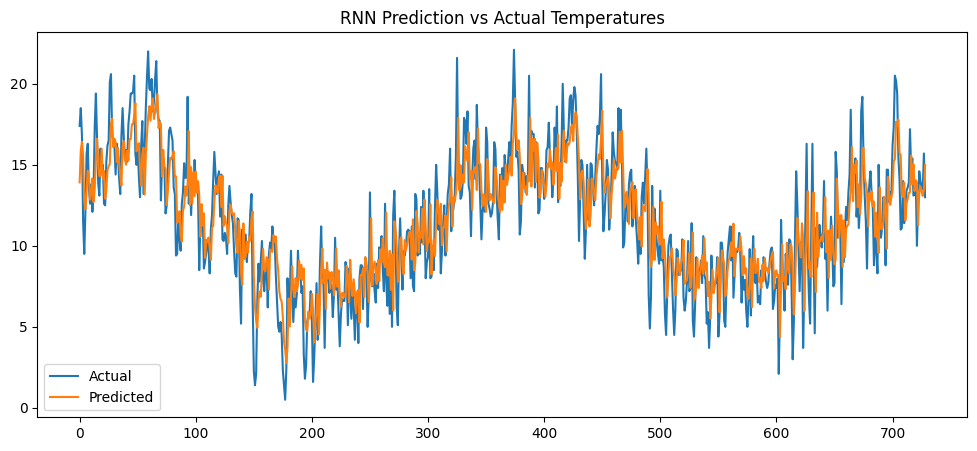

In [ ]:
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual temperatures
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('RNN Prediction vs Actual Temperatures')
plt.show()


# Analysis: RNN Predictions vs Actual Temperatures (Melbourne Data)


---

## 1. Purpose of the Plot

- **Blue Line (Actual)**: True minimum daily temperatures in the test set.
- **Orange Line (Predicted)**: Temperatures predicted by the RNN using the past 5 days.

X-axis: Days in the test period (~700 days).  
Y-axis: Temperature in °C (inverse-transformed from scaled data).

---

## 2. Key Observations

### Trend Capturing
The RNN closely follows seasonal trends:
- Higher values during summer months.
- Lower values during winter months.
- Indicates the RNN effectively learns broad seasonal patterns.

### Local Fluctuations
The RNN tracks many local ups and downs but:
- Does not capture every spike or dip exactly.
- Predicts an average behavior around local fluctuations.
- Sudden weather changes are not fully predicted.

### Smoothing Effect
The predicted line is slightly smoother than the actual values:
- RNN predictions are based on learned averages, reducing noise.
- Sharp, sudden peaks in actual data are sometimes under or over-predicted.

---

## 3. Theoretical Interpretation

### RNN Memory Limitations
The RNN uses a 5-day input window:
- Good for capturing short-term dependencies.
- Limited for learning long-term seasonal lags or dependencies beyond this window.

### Vanilla RNN Constraints
Vanilla RNNs:
- Handle short-term temporal relationships well.
- Struggle with long-term dependencies due to vanishing gradients.

### Data Characteristics
Weather data:
- Contains inherent randomness and noise.
- Uses only temperature; additional features (humidity, wind, pressure) could improve predictions.

---

## 4. Implications for Learning

- The RNN model is functioning as expected for a short-term, single-feature forecasting task.
- It provides a strong baseline for evaluating the effectiveness of advanced architectures.

---

## 5. Next Steps for Systematic Learning

- Implement and compare with LSTM:
  - Test whether it improves lag handling and accuracy.
- Implement and compare with GRU:
  - Assess computational efficiency with similar or better accuracy.
- Experiment with longer window sizes:
  - 10-day, 20-day windows to test RNN limits.
- Explore adding additional weather variables:
  - Create a multivariate time series forecasting model.

---

## Summary Table

| Aspect                  | Observation                                  |
|--------------------------|----------------------------------------------|
| Trend Tracking          | Accurately follows seasonal trends          |
| Local Fluctuations      | Captured partially, with smoothing          |
| Prediction Smoothness   | Smoother predictions than actual data       |
| Model Limitations       | Limited long-term memory with 5-day window  |
| Recommended Next Steps  | LSTM, GRU, extended windows, add features   |

---

## Why this matters

Understanding the prediction plot:
- Provides insight into what the model has learned.
- Allows targeted adjustments (architecture, data, features).
- Builds intuition about sequence modeling and time series behavior.
- Prepares you to evaluate and explain model performance in system design or research discussions.


# Keras RNN on Melbourne Temperature Dataset

## Overview

We use `SimpleRNN` to predict next-day temperature using past 5 days.

## Model Parameters
- **units=32**: Hidden units (controls capacity).
- **activation='tanh'**: Keeps outputs between -1 and 1.
- **input_shape=(5, 1)**: 5 time steps, 1 feature.

## Compilation
- **optimizer='adam'**: Adaptive learning rate.
- **loss='mse'**: Suitable for regression.
- **metrics=['mae']**: Interpret model error easily.

## Training
- **epochs=50**: Sufficient for convergence.
- **batch_size=32**: Balance between stability and speed.

## Theory-Result Connection
- **Train Loss vs Val Loss**: Check overfitting.
- **Predictions vs Actual**: Evaluate forecasting capability.
- **RNN Limitations**:
    - May struggle with **long-term dependencies** (vanishing gradients).
    - Tends to capture **local patterns** well if sequence is not too long.

## Next Steps
Once understood:
- Implement **LSTM** for comparison.
- Implement **GRU** for further analysis.

---



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)

print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f} °C")


R-squared Score: 0.6925
Mean Absolute Error: 1.7917 °C


# Long Short-Term Memory (LSTM) - Theoretical Overview

## 1. What is LSTM?

- LSTM stands for **Long Short-Term Memory**.
- It is an **advanced type of Recurrent Neural Network (RNN)** designed to:
  - Capture **long-term dependencies** in sequential data.
  - Avoid **vanishing gradient issues** during training.

---

## 2. Why LSTM was developed

### The problem with vanilla RNN:
- RNNs are good at learning **short-term patterns**.
- However, for **long sequences**:
  - Gradients shrink during backpropagation.
  - The model **forgets important earlier information**.
  - This is known as the **vanishing gradient problem**.

### LSTM solution:
- Introduces **cell state and gates** to control the flow of information.
- Allows **relevant information to be carried unchanged over long periods**.
- Learns **what to remember, what to forget, and what to output**.

---

## 3. Key Components of LSTM

### 1️⃣ Cell State $ C_t $:
- Acts like a **conveyor belt**, carrying long-term information across time steps.
- Information can be added or removed via gates.

### 2️⃣ Hidden State $ h_t $:
- Similar to RNN's hidden state.
- Represents the output at each time step.

### 3️⃣ Gates:
- **Forget Gate $ f_t $**: Decides what information to discard from the cell state.
- **Input Gate $ i_t $**: Decides what new information to store in the cell state.
- **Output Gate $o_t$**: Decides what part of the cell state to output as the hidden state.

---

## 4. Simplified Equations

**Forget Gate:**
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
Decides what to forget from $ C_{t-1} $.

**Input Gate and Candidate:**
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$
Decides what new information to add.

**Cell State Update:**
$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$
Updates the cell state.

**Output Gate and Hidden State:**
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
h_t = o_t \cdot \tanh(C_t)
$$
Calculates the output (hidden state) for the current time step.

---

## 5. Intuitive Flow

At each time step:
- **Input $ x_t $** and **previous hidden state $ h_{t-1} $** enter.
- **Forget gate** filters what to discard from memory.
- **Input gate** decides what new info to add to memory.
- **Cell state $ C_t $** is updated.
- **Output gate** decides what part of the cell state to output.
- **Hidden state $ h_t $** is passed to the next time step.

---

## 6. Why LSTM is powerful

- **Long-term memory:** Cell state retains important information across many time steps.
- **Dynamic memory control:** Gates adjust memory based on learning.
- **Better for longer sequences:** Learns seasonal, periodic, or contextual patterns.
- **Avoids vanishing gradient issues:** Allows effective learning over longer horizons.

---

## 7. Where LSTM is used

- **Time Series Forecasting:** Stock prices, temperature, sales.
- **Natural Language Processing:** Text generation, translation, sentiment analysis.
- **Speech Recognition.**
- **Sequential Anomaly Detection.**

---

## 8. Summary Table

| Component | Purpose |
|-----------|---------|
| **Cell State $ C_t $** | Long-term memory |
| **Hidden State $ h_t $** | Output at each time step |
| **Forget Gate** | Remove unneeded info |
| **Input Gate** | Add new relevant info |
| **Output Gate** | Output relevant info |

---

## 9. Key Takeaways

- LSTM solves **RNN limitations** for longer-term dependencies.
- Uses **gates to control memory** systematically.
- Allows you to build **robust models for sequential data** without forgetting early important information.

---



In [ ]:
from keras.layers import LSTM
model = Sequential([
    LSTM(32, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0468 - val_loss: 0.0106
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0101
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - val_loss: 0.0096
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - val_loss: 0.0093
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - val_loss: 0.0088
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0087
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - val_loss: 0.0084
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_lo

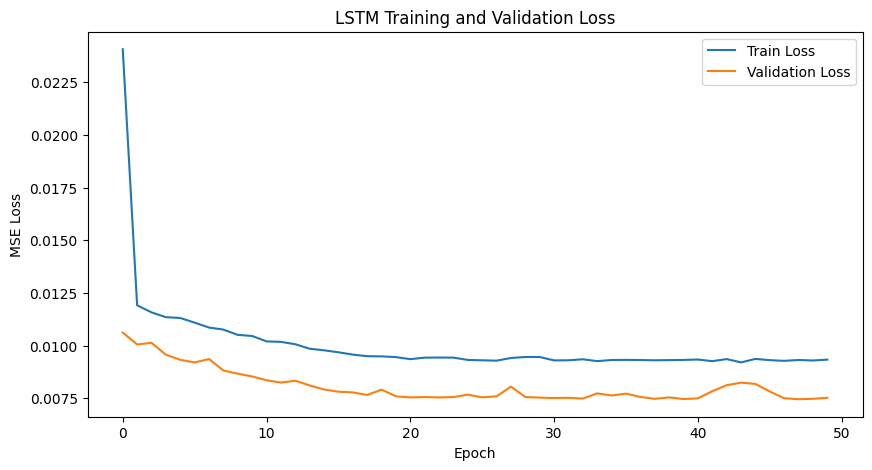

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


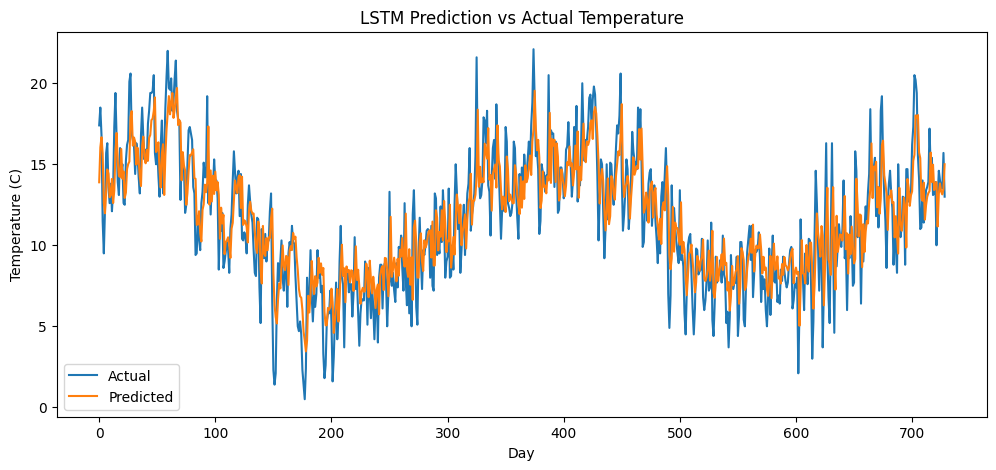

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Prediction vs Actual Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f} °C")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} °C")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.7957 °C
Root Mean Squared Error (RMSE): 2.2809 °C
R-squared (R²): 0.6913


# Gated Recurrent Unit (GRU) - Theoretical Overview

## 1. What is GRU?

- **GRU (Gated Recurrent Unit)** is a type of **Recurrent Neural Network (RNN)**.
- Designed to **capture long-term dependencies** in sequential data efficiently.
- Introduced as a **simpler alternative to LSTM** while addressing the **vanishing gradient problem**.

---

## 2. Why GRU was developed

- **Vanilla RNNs**:
  - Can capture short-term dependencies.
  - Struggle with long sequences due to vanishing gradients.

- **LSTM**:
  - Adds gates and cell states to solve this problem.
  - Computationally heavier.

- **GRU**:
  - Uses a **simpler gated mechanism**.
  - Requires fewer parameters.
  - Provides similar capabilities to LSTM with faster training.

---

## 3. Core Components of GRU

### 1️⃣ Update Gate $ z_t $
- Determines **how much past information to retain** in the current hidden state.
- Combines the functionality of LSTM’s forget and input gates.

### 2️⃣ Reset Gate $ r_t $
- Decides **how much of the previous hidden state to forget** while computing the new hidden state.

### 3️⃣ Hidden State $ h_t $
- GRU **does not have a separate cell state** like LSTM.
- The hidden state carries all the information across time steps.

---

## 4. GRU Workflow

At each time step:
- Takes **current input $ x_t $** and **previous hidden state $ h_{t-1} $**.
- Computes:
  - **Reset Gate**: What to forget from the past.
  - **Update Gate**: What to keep from the past.
- Generates a **candidate hidden state** based on the reset gate.
- Computes the **final hidden state** by blending the candidate and previous hidden state using the update gate.

---

## 5. Mathematical Summary

- **Update Gate:**
  - Controls the balance between keeping the past and using the new candidate state.
- **Reset Gate:**
  - Controls how much of the past to forget while forming the candidate.
- **Candidate Hidden State:**
  - Created using the reset gate's filtered past and current input.
- **Final Hidden State:**
  - A blend of the previous hidden state and the candidate hidden state, weighted by the update gate.

---

## 6. GRU vs LSTM

| Aspect | GRU | LSTM |
|--------|-----|------|
| Gates | 2 (Update, Reset) | 3 (Input, Forget, Output) |
| Cell State | No | Yes |
| Parameters | Fewer | More |
| Training Speed | Faster | Slower |
| Memory Efficiency | Higher | Lower |
| Performance | Often similar | Often similar |

---

## 7. Key Advantages of GRU

- **Faster training due to fewer parameters.**
- **Retains long-term dependencies effectively.**
- **Suitable for time series forecasting, NLP, and sequential data modeling.**
- Provides a **good balance between complexity and performance** in practical applications.

---

## 8. When to choose GRU

- When training speed and memory efficiency are priorities.
- When testing a baseline gated architecture before deciding on LSTM.
- When your dataset requires capturing dependencies but may not need the additional flexibility of LSTM’s separate cell state.




In [ ]:
from keras.layers import GRU
model = Sequential([
    GRU(32, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1366 - val_loss: 0.0159
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0129
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - val_loss: 0.0113
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - val_loss: 0.0096
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - val_loss: 0.0092
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0113 - val_loss: 0.0093
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0085
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0082
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_lo

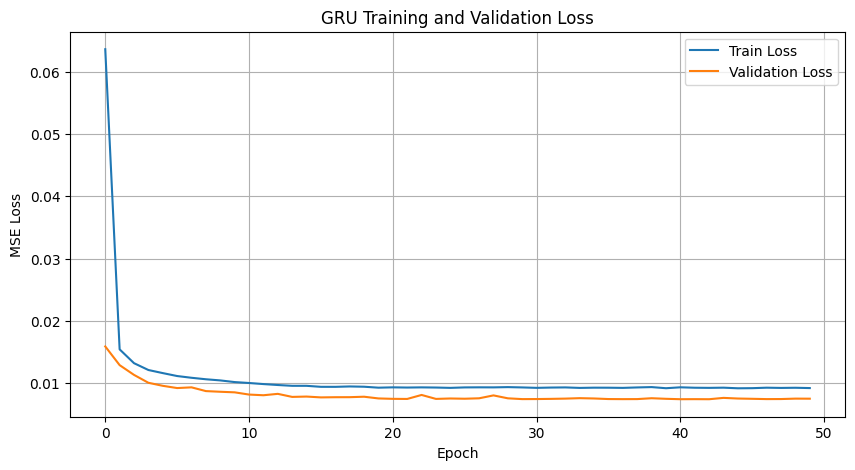

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


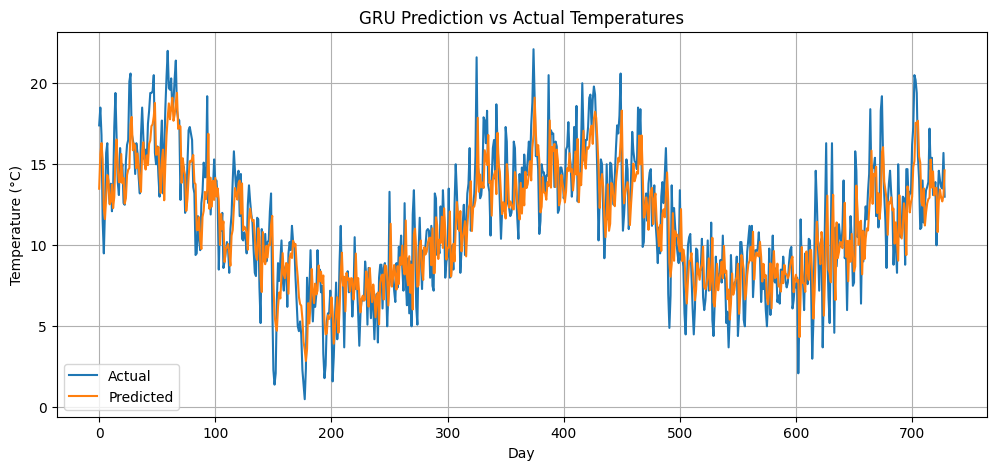

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('GRU Prediction vs Actual Temperatures')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f} °C")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} °C")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.8050 °C
Root Mean Squared Error (RMSE): 2.2810 °C
R-squared (R²): 0.6913
